# 비디오 게임 매출 정보 데이터 전처리

https://www.kaggle.com/datasets/gregorut/videogamesales/data

이 데이터셋은 16,500개 이상의 비디오 게임에 대한 매출 정보 등이 담겨 있다.  
전처리 기법 중 다수를 시도해 볼 수 있는 데이터셋으로, 오늘 배운 데이터 전처리 복습을 통해 개념을 다져볼 것이다.

In [2]:
#  필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터 확인

In [3]:
game = pd.read_csv("/Users/project/aiffel/video_game/vgsales.csv")
game.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


vgsales.csv

- Rank : 전체 매출 순위
- Name : 게임 이름
- Platform : 게임 출시 플랫폼(예: PC, PS4 등)
- Year : 게임이 출시된 연도
- Genre : 게임의 장르
- Publisher : 게임 퍼블리셔
- NA_Sales : 북미 지역 매출(백만 단위)
- EU_Sales : 유럽 내 매출(백만 단위)
- JP_Sales : 일본 내 매출(백만 단위)
- Other_Sales : 나머지 지역에서의 매출(수백만 단위)
- Global_Sales : 전 세계 총 판매량

In [5]:
game.shape

(16598, 11)

In [6]:
game.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## 데이터 전처리

## 결측치 (Missing Data)
결측치: 데이터에 값이 없는 것

결측치를 처리하는 방법
1. 결측치가 있는 데이터를 제거한다.
2. 결측치를 어떤 값으로 대체한다.  
    (결측치를 대체하는 방법은 다양한데, 데이터마다 특성을 반영하여 해결해야 한다.)

### 결측치 확인

In [7]:
game.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

#### 결측치만 있는 행 출력

In [8]:
game[game.isna().any(axis=1)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


#### Year 가 NaN인 행 출력

In [9]:
game[game['Year'].isna()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


#### Publisher 가 NaN인 행 출력

In [10]:
game[game['Publisher'].isna()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53
4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.00,0.01,0.42


#### Publisher, Year 모두 NaN인 행 출력

In [11]:
game[(game['Publisher'].isna()) & game['Year'].isna()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48
5302,5304,Dragon Ball Z: Budokai Tenkaichi 2 (JP sales),Wii,NaN,Action,NaN,0.15,0.05,0.14,0.01,0.35
6272,6274,The Legend of Zelda: The Minish Cap(weekly JP ...,GBA,NaN,Action,NaN,0.00,0.00,0.27,0.01,0.27
7351,7353,Yu Yu Hakusho: Dark Tournament,PS2,NaN,Fighting,NaN,0.10,0.08,0.00,0.03,0.21
9749,9751,Super Robot Wars OG Saga: Masou Kishin II - Re...,PSP,NaN,Strategy,NaN,0.00,0.00,0.12,0.00,0.12
10494,10496,Atsumare! Power Pro Kun no DS Koushien,DS,NaN,Sports,NaN,0.00,0.00,0.10,0.00,0.10
11076,11078,Action Man-Operation Extreme,PS,NaN,Action,NaN,0.05,0.03,0.00,0.01,0.09
12487,12489,Chou Soujuu Mecha MG,DS,NaN,Simulation,NaN,0.00,0.00,0.06,0.00,0.06


#### Publisher가 Unkown 이면서 Year가 NaN인 행 출력

In [12]:
game[(game['Publisher'] == 'Unknown') & game['Year'].isna()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1649,1651,NASCAR Thunder 2003,PS2,NaN,Racing,Unknown,0.60,0.46,0.00,0.16,1.22
2114,2116,Suikoden III,PS2,NaN,Role-Playing,Unknown,0.29,0.23,0.38,0.08,0.98
2173,2175,Wheel of Fortune,PS2,NaN,Misc,Unknown,0.47,0.36,0.00,0.12,0.95
2286,2288,Namco Museum,XB,NaN,Misc,Unknown,0.77,0.11,0.00,0.04,0.91
2295,2297,Rhythm Heaven,Wii,NaN,Misc,Unknown,0.13,0.00,0.77,0.01,0.90
...,...,...,...,...,...,...,...,...,...,...,...
16194,16197,Shorts,DS,NaN,Platform,Unknown,0.01,0.00,0.00,0.00,0.01
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


### 결측치가 있는 데이터 제거

In [13]:
del_game = game.copy()
del_game.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [14]:
del_game.drop(['Year', 'Publisher'], inplace=True, axis=1)
del_game.head()

,Rank,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,Sports,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,Racing,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,Sports,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37


In [15]:
del_game.isna().sum()

Rank            0
Name            0
Platform        0
Genre           0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

### 결측치가 있는 데이터 대체

- Publisher는 게임을 배급하는 회사(게임 개발사의 게임을 받아서 유통하는 회사)이다.
- Year는 게임 출시 연도이다.

#### 상관관계 확인

In [16]:
# 데이터셋의 데이터 타입 확인
game.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [17]:
# 숫자타입만 출력
num_game = game.select_dtypes(include='number')
num_game.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.401362,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


<Axes: >

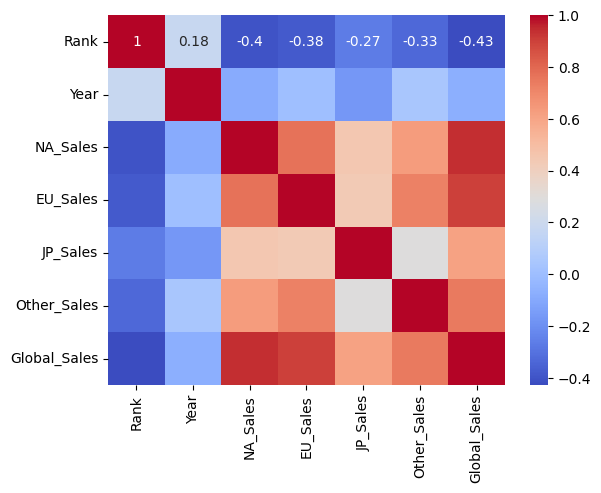

In [18]:
sns.heatmap(num_game.corr(), annot=True, annot_kws={"size": 10}, cmap="coolwarm")


#### Year 대체

In [19]:
re_game = game.copy()
re_game.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [20]:
# Year 유니크 값 확인
re_game['Year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [21]:
re_game['Year'] = re_game['Year'].fillna(9999.0)

In [22]:
re_game['Year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000., 9999., 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

##### Year 데이터 타입 변경

In [23]:
re_game['Year'].dtype

dtype('float64')

In [24]:
#  df.astype({'col1':'int32'})
re_game['Year'] = re_game['Year'].astype('int')

#### Publisher 대체

In [25]:
re_game['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


In [26]:
re_game['Publisher'] = re_game['Publisher'].fillna('Unknown')

In [27]:
re_game.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## 중복 데이터

같은 값을 가진 데이터 없이 행별로 값이 유일해야 한다면 중뽁된 데이터를 제거해야 한다.

### Year, Publisher 삭제한 데이터(del_game)

In [28]:
del_game[del_game.duplicated()]

,Rank,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


### Year, Publisher 대체한 데이터(re_game)

In [29]:
re_game[re_game.duplicated()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


## 이상치(Outlier)
이상치: 대부분 값의 범위에서 벗어나 극단적으로 크거나 작은 값을 의미한다.

이상치라고 판단한 뒤 어떻게 해야 할까?
1. 가장 간단한 방법으로 이상치를 삭제할 수 있다.
    - 이상치를 원해 데이터에서 삭제하고 이상치끼리 따로 분석하는 방안도 있다.
2. 이상치를 다른 값으로 대체할 수 있다.
    - 데이터가 적으면 이상치를 삭제하기보다 다른 값으로 대체하는 것이 나을 수 있다.
    - ex. 최대, 최소값을 설정해 데이터의 범위를 제한할 수 있다.
3. 결측와 마찬가지로 다른 데이터를 활용하여 예측 모델을 만들어 예측값을 활용할 수도 있다.
4. 구간화(Binning)을 통해 수치형 데이터를 범주형으로 바꿀 수도 있다.

### z-score method
평균과 표준편차를 이용하는 방법

- 평균을 빼주고 표쥰편차로 나눠서 $z-score  (\frac{X - \mu}{\sigma})$ 계산
- 특정 기준을 넘어서는 데이터에 대해 이상치라고 판단한다.
    - 기준을 작제 하면 이상치라고 판단하는 데이터가 많아지고, 기준을 크게 하면 이상치라고 판다는 데이터가 적어진다.

In [30]:
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col])) / np.std(df[col]) > z].index

#### del_game 이상치

In [31]:
del_game.columns

Index(['Rank', 'Name', 'Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales',
       'Other_Sales', 'Global_Sales'],
      dtype='object')

In [32]:
del_game.select_dtypes(include='number')

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,41.49,29.02,3.77,8.46,82.74
1,2,29.08,3.58,6.81,0.77,40.24
2,3,15.85,12.88,3.79,3.31,35.82
3,4,15.75,11.01,3.28,2.96,33.00
4,5,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...
16593,16596,0.01,0.00,0.00,0.00,0.01
16594,16597,0.01,0.00,0.00,0.00,0.01
16595,16598,0.00,0.00,0.00,0.00,0.01
16596,16599,0.00,0.01,0.00,0.00,0.01


1. NA_Sales 이상치

In [33]:
del_game.loc[outlier(del_game, 'NA_Sales', 1.5)]

,Rank,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,Sports,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,Racing,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,Sports,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...
1115,1117,Dig Dug,2600,Puzzle,1.52,0.10,0.00,0.02,1.64
1123,1125,ESPN NFL 2K5,XB,Sports,1.54,0.02,0.00,0.07,1.63
1146,1148,SpongeBob's Atlantis SquarePantis,DS,Action,1.50,0.00,0.00,0.11,1.61
1153,1155,River Raid,2600,Shooter,1.49,0.09,0.00,0.02,1.60


2. EU_Sales 이상치

In [34]:
del_game.loc[outlier(del_game, 'EU_Sales', 1.5)]

,Rank,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,Sports,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,Racing,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,Sports,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...
1829,1831,Worldwide Soccer Manager 2008,PC,Sports,0.00,1.12,0.00,0.00,1.12
1882,1884,Empire: Total War,PC,Strategy,0.01,0.97,0.00,0.11,1.09
1924,1926,Championship Manager 99/00,PC,Sports,0.00,0.98,0.00,0.09,1.07
2047,2049,Championship Manager 3,PC,Sports,0.00,0.93,0.00,0.08,1.01


3. JP_Sales 이상치

In [35]:
del_game.loc[outlier(del_game, 'JP_Sales', 1.5)]

,Rank,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,Sports,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,Racing,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,Sports,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...
3648,3650,Yokai Sangokushi,3DS,Action,0.00,0.00,0.55,0.00,0.55
3657,3659,Derby Stallion 04,PS2,Sports,0.00,0.00,0.55,0.00,0.55
3667,3669,Super Robot Taisen F,SAT,Strategy,0.00,0.00,0.55,0.00,0.55
3669,3671,Soccer Tsuku 2002: J-League Pro Soccer Club o ...,PS2,Sports,0.00,0.00,0.55,0.00,0.55


4. Other_Sales 이상치

In [36]:
del_game.loc[outlier(del_game, 'Other_Sales', 1.5)]

,Rank,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,Sports,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,Racing,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,Sports,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...
3689,3691,SingStar Summer Party,PS2,Misc,0.00,0.06,0.00,0.48,0.54
3832,3834,The Golden Compass,PS2,Action,0.13,0.00,0.00,0.39,0.52
4381,4383,SingStar Take That,PS2,Misc,0.00,0.06,0.00,0.39,0.45
4384,4386,Disney Sing It! High School Musical 3: Senior ...,PS2,Misc,0.09,0.02,0.00,0.34,0.45


5. Global_Sales 이상치

In [37]:
del_game.loc[outlier(del_game, 'Global_Sales', 1.5)]

,Rank,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,Sports,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,Racing,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,Sports,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...
500,501,Call of Duty: Finest Hour,PS2,Shooter,1.51,1.12,0.01,0.24,2.89
501,502,Zumba Fitness 2,Wii,Sports,1.54,1.07,0.00,0.28,2.88
502,503,Syphon Filter,PS,Shooter,2.03,0.72,0.02,0.11,2.88
503,504,Imagine: Babyz,DS,Simulation,1.30,1.27,0.00,0.31,2.88


### re_game 이상치

In [38]:
re_game.select_dtypes(include='number')

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,2006,41.49,29.02,3.77,8.46,82.74
1,2,1985,29.08,3.58,6.81,0.77,40.24
2,3,2008,15.85,12.88,3.79,3.31,35.82
3,4,2009,15.75,11.01,3.28,2.96,33.00
4,5,1996,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...
16593,16596,2002,0.01,0.00,0.00,0.00,0.01
16594,16597,2003,0.01,0.00,0.00,0.00,0.01
16595,16598,2008,0.00,0.00,0.00,0.00,0.01
16596,16599,2010,0.00,0.01,0.00,0.00,0.01


1. Year 이상치

In [39]:
re_game.loc[outlier(re_game, 'Year', 1.5)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,9999,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,9999,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,9999,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,9999,Fighting,Unknown,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,9999,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,9999,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,9999,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,9999,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,9999,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


2. NA_Sales 이상치

In [40]:
re_game.loc[outlier(re_game, 'NA_Sales', 1.5)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
1115,1117,Dig Dug,2600,1982,Puzzle,Atari,1.52,0.10,0.00,0.02,1.64
1123,1125,ESPN NFL 2K5,XB,2004,Sports,Sega,1.54,0.02,0.00,0.07,1.63
1146,1148,SpongeBob's Atlantis SquarePantis,DS,2007,Action,THQ,1.50,0.00,0.00,0.11,1.61
1153,1155,River Raid,2600,1981,Shooter,Activision,1.49,0.09,0.00,0.02,1.60


3. EU_Sales 이상치

In [41]:
re_game.loc[outlier(re_game, 'EU_Sales', 1.5)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
1829,1831,Worldwide Soccer Manager 2008,PC,2007,Sports,Russel,0.00,1.12,0.00,0.00,1.12
1882,1884,Empire: Total War,PC,2009,Strategy,Sega,0.01,0.97,0.00,0.11,1.09
1924,1926,Championship Manager 99/00,PC,1999,Sports,Eidos Interactive,0.00,0.98,0.00,0.09,1.07
2047,2049,Championship Manager 3,PC,2003,Sports,Eidos Interactive,0.00,0.93,0.00,0.08,1.01


4. JP_Sales 이상치

In [42]:
re_game.loc[outlier(re_game, 'JP_Sales', 1.5)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
3648,3650,Yokai Sangokushi,3DS,2016,Action,Level 5,0.00,0.00,0.55,0.00,0.55
3657,3659,Derby Stallion 04,PS2,2004,Sports,Enterbrain,0.00,0.00,0.55,0.00,0.55
3667,3669,Super Robot Taisen F,SAT,1997,Strategy,Banpresto,0.00,0.00,0.55,0.00,0.55
3669,3671,Soccer Tsuku 2002: J-League Pro Soccer Club o ...,PS2,2002,Sports,Sega,0.00,0.00,0.55,0.00,0.55


5. Other_Sales 이상치 

In [43]:
re_game.loc[outlier(re_game, 'Other_Sales', 1.5)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
3689,3691,SingStar Summer Party,PS2,2008,Misc,Sony Computer Entertainment,0.00,0.06,0.00,0.48,0.54
3832,3834,The Golden Compass,PS2,2007,Action,Sega,0.13,0.00,0.00,0.39,0.52
4381,4383,SingStar Take That,PS2,2009,Misc,Sony Computer Entertainment,0.00,0.06,0.00,0.39,0.45
4384,4386,Disney Sing It! High School Musical 3: Senior ...,PS2,2008,Misc,Disney Interactive Studios,0.09,0.02,0.00,0.34,0.45


6. Global_Sales 이상치

In [44]:
re_game.loc[outlier(re_game, 'Global_Sales', 1.5)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
500,501,Call of Duty: Finest Hour,PS2,2004,Shooter,Activision,1.51,1.12,0.01,0.24,2.89
501,502,Zumba Fitness 2,Wii,2011,Sports,Majesco Entertainment,1.54,1.07,0.00,0.28,2.88
502,503,Syphon Filter,PS,1999,Shooter,Sony Computer Entertainment,2.03,0.72,0.02,0.11,2.88
503,504,Imagine: Babyz,DS,2007,Simulation,Ubisoft,1.30,1.27,0.00,0.31,2.88


### IQR method
사분위 범위수 IQR(Interquartile range)로 이상치 알아내는 법

#### del_game

In [45]:
del_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Genre         16598 non-null  object 
 4   NA_Sales      16598 non-null  float64
 5   EU_Sales      16598 non-null  float64
 6   JP_Sales      16598 non-null  float64
 7   Other_Sales   16598 non-null  float64
 8   Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.1+ MB


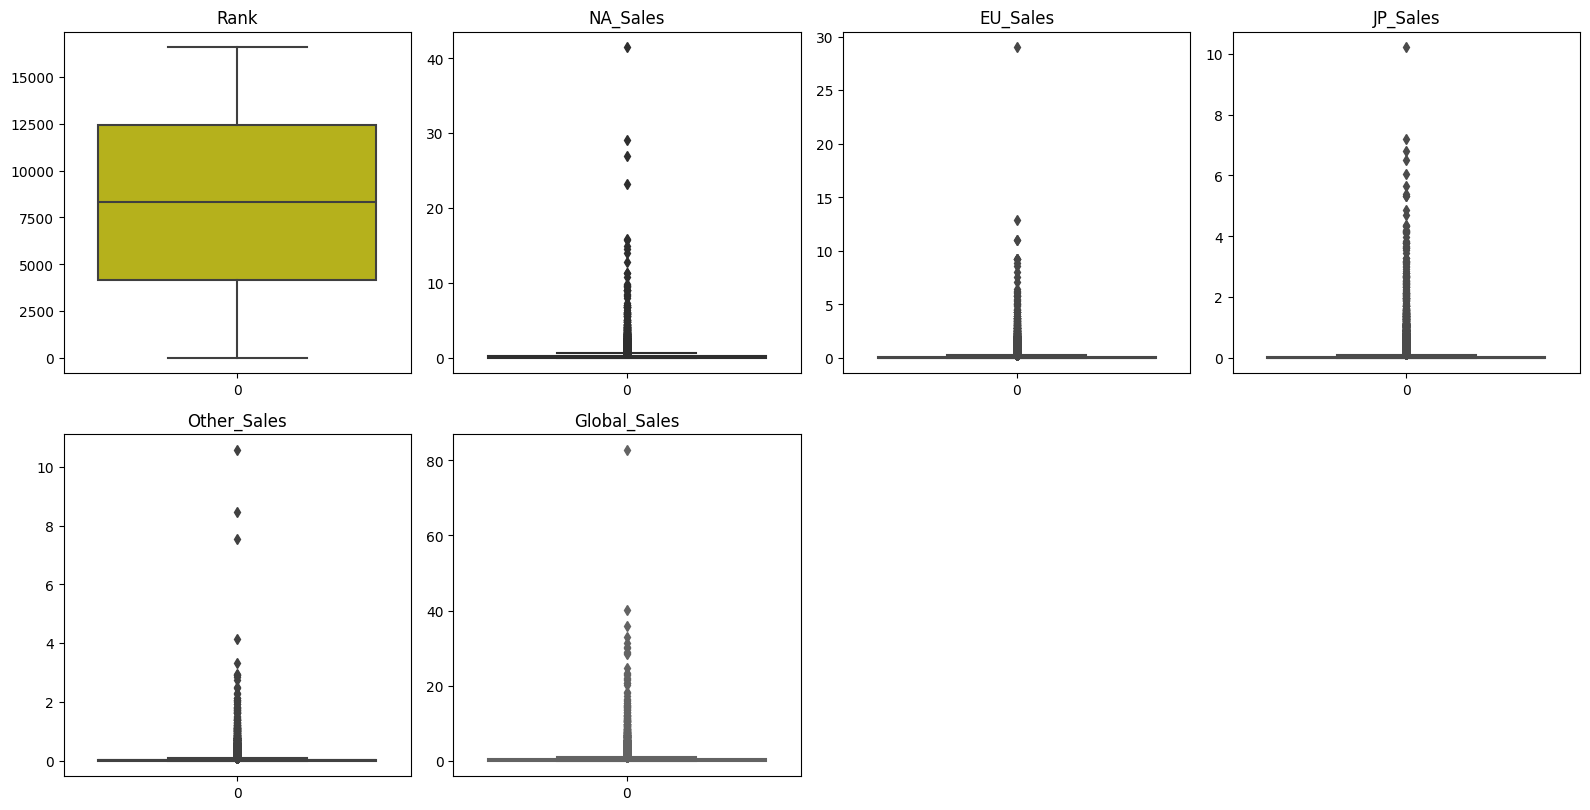

In [46]:
import random

# hexadecimal 형식으로 랜덤 색 선택
def rand_color():
    return "#" + "".join([random.choice('0123456789ABCDEF') for _ in range(6)])

# 숫자 컬럼만 선택
numerical_cols = del_game.select_dtypes(include=[np.number]).columns.tolist()

# 서브블롯의 행을 계산
num_cols = len(numerical_cols)
num_rows = num_cols // 4
num_rows += num_cols % 4

position = range(1, num_cols + 1)

fig = plt.figure(figsize=(16, num_rows * 4))

#서브플롯으로 boxplot 그리기
for k, col in zip(position, numerical_cols):
  ax = fig.add_subplot(num_rows, 4, k)
  sns.boxplot(del_game[col], color=rand_color(), ax=ax)
  ax.set_title(col)

plt.tight_layout()
plt.show()

#### re_game

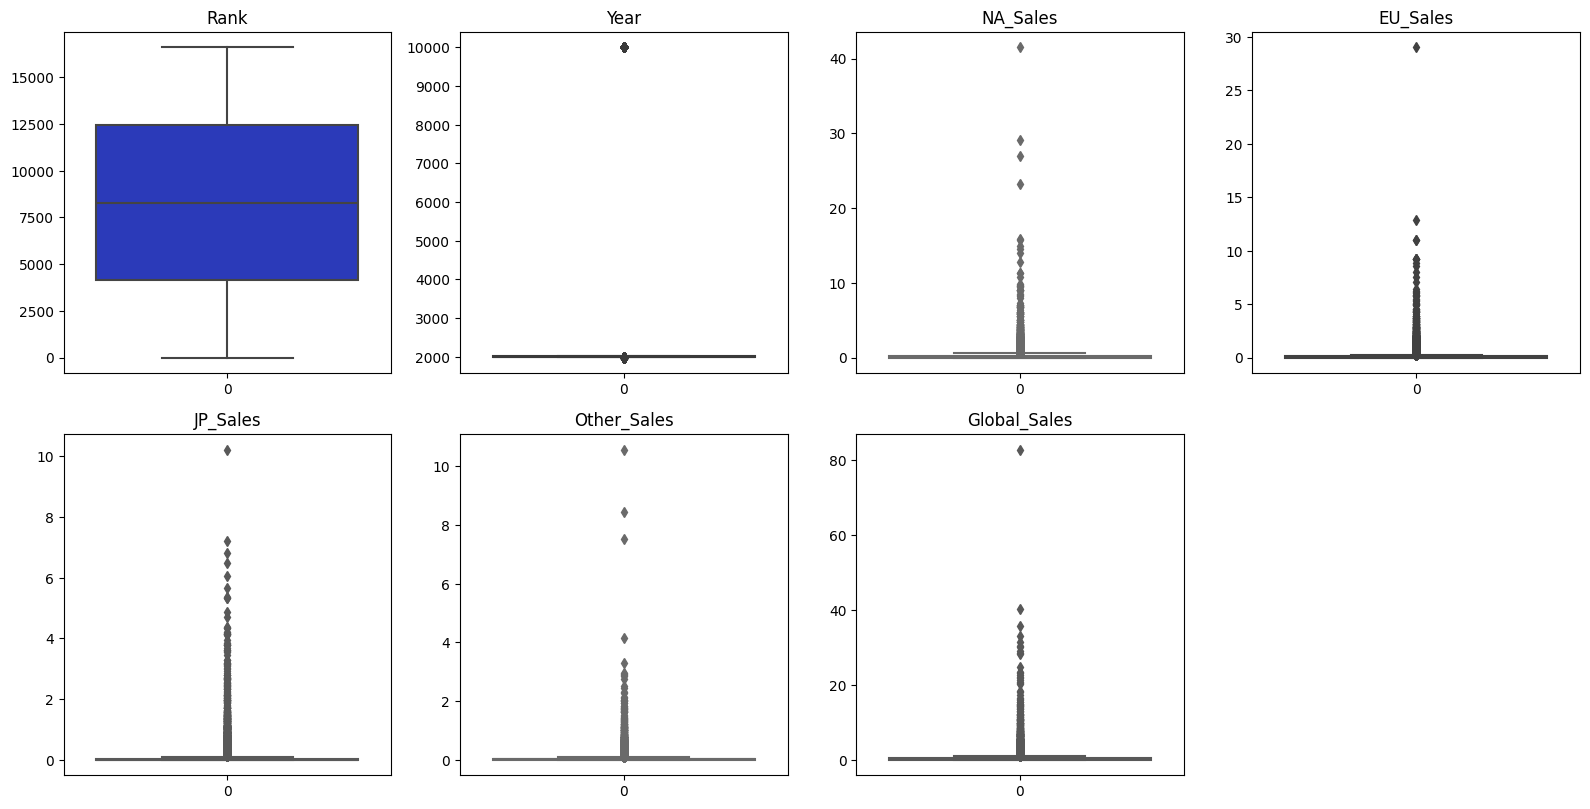

In [47]:
import random

# hexadecimal 형식으로 랜덤 색 선택
def rand_color():
    return "#" + "".join([random.choice('0123456789ABCDEF') for _ in range(6)])

# 숫자 컬럼만 선택
numerical_cols = re_game.select_dtypes(include=[np.number]).columns.tolist()

# 서브블롯의 행을 계산
num_cols = len(numerical_cols)
num_rows = num_cols // 4
num_rows += num_cols % 4

position = range(1, num_cols + 1)

fig = plt.figure(figsize=(16, num_rows * 4))

#서브플롯으로 boxplot 그리기
for k, col in zip(position, numerical_cols):
  ax = fig.add_subplot(num_rows, 4, k)
  sns.boxplot(re_game[col], color=rand_color(), ax=ax)
  ax.set_title(col)

plt.tight_layout()
plt.show()

매출 데이터에서 이상치를 판단하는 것은 데이터의 특성 및 도메인에 따라 다를 수 있다.   
이상치는 일반적으로 주어진 데이터 집합의 패턴에서 벗어난 극단적인 값으로 정의된다.   
이러한 이상치는 때로는 실제로 발생한 극단적인 사건을 나타낼 수 있지만, 때로는 데이터 입력 오류 또는 기타 이유로 발생할 수도 있다.  
따라서 여기서는 박스플롯과 z-score로 이상치를 확인하는 방법을 보여주고 이상치 제거는 따로 하지 않을 것이다.

## 정규화(Normalization)

### Standardization

- 데이터의 평균은 0, 분산은 1로 변환한다.
    - 보통 평균이 0이고 표준편차가 1일때 사용한다. 
    - 그렇기에 데이터가 가우시안 분포를 따를 경우에 유용하다.  
- $\frac {X - \mu}{\sigma}$

#### del_game

In [48]:
del_game.describe()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [49]:
from sklearn.preprocessing import StandardScaler

del_scaler = StandardScaler()
del_scaler.fit_transform(del_game.select_dtypes(include='number'))

array([[-1.73207602, 50.48050838, 57.13692978, 11.93805759, 44.60608534,
        52.86402505],
       [-1.73186733, 35.28443669,  6.7941883 , 21.76729621,  3.82822442,
        25.53250298],
       [-1.73165863, 19.08427325, 25.19778483, 12.00272364, 17.29711476,
        22.69002469],
       ...,
       [ 1.7316147 , -0.32408584, -0.29020692, -0.25149161, -0.25486439,
        -0.33919426],
       [ 1.73182339, -0.32408584, -0.27041811, -0.25149161, -0.25486439,
        -0.33919426],
       [ 1.73203209, -0.31184082, -0.29020692, -0.25149161, -0.25486439,
        -0.33919426]])

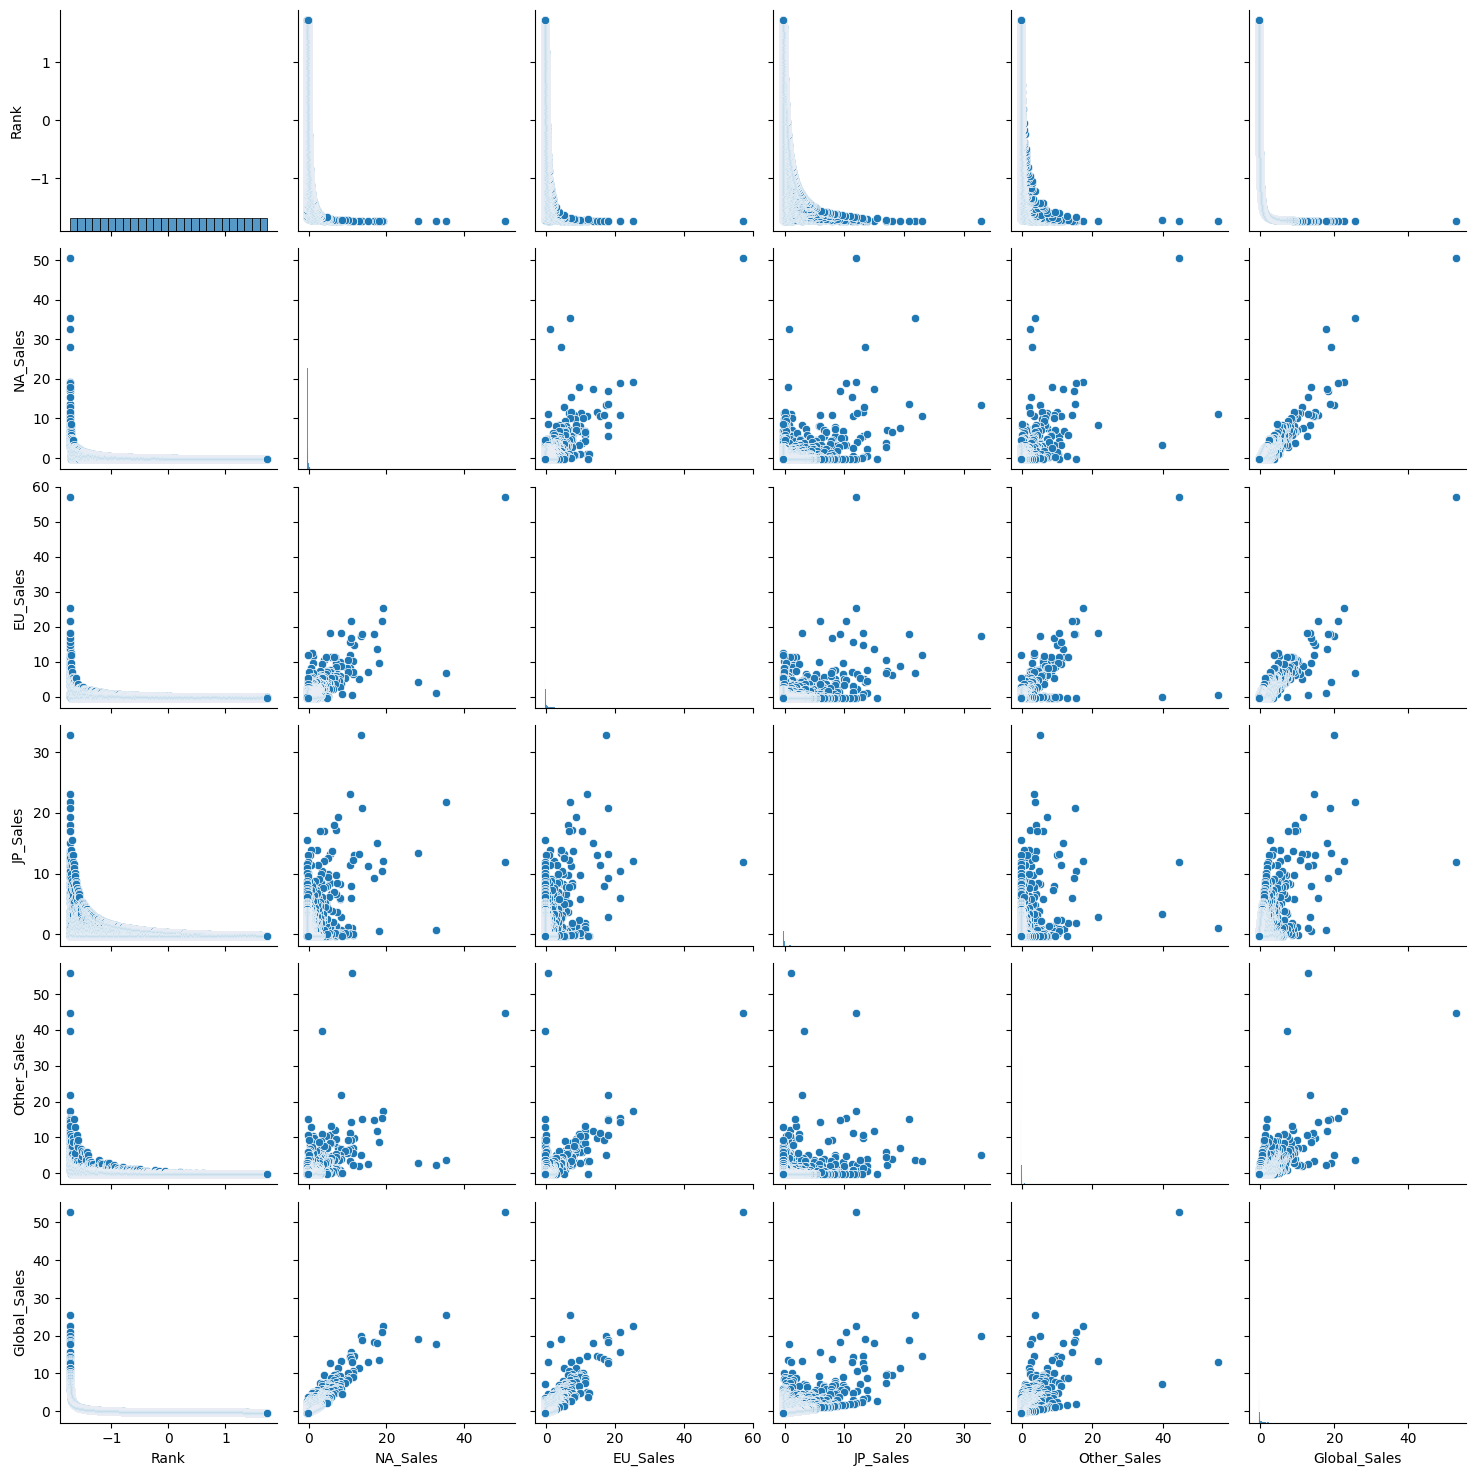

In [50]:
numeric_columns = del_game.select_dtypes(include='number')
scaled_data = del_scaler.fit_transform(numeric_columns)
sns.pairplot(pd.DataFrame(scaled_data, columns=numeric_columns.columns))
plt.show()

#### re_game

In [51]:
re_game.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2136.903663,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,1012.954566,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2011.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,9999.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [52]:
from sklearn.preprocessing import StandardScaler

re_scaler = StandardScaler()
re_scaler.fit_transform(re_game.select_dtypes(include='number'))

array([[-1.73207602, -0.12923344, 50.48050838, ..., 11.93805759,
        44.60608534, 52.86402505],
       [-1.73186733, -0.1499655 , 35.28443669, ..., 21.76729621,
         3.82822442, 25.53250298],
       [-1.73165863, -0.12725896, 19.08427325, ..., 12.00272364,
        17.29711476, 22.69002469],
       ...,
       [ 1.7316147 , -0.12725896, -0.32408584, ..., -0.25149161,
        -0.25486439, -0.33919426],
       [ 1.73182339, -0.12528448, -0.32408584, ..., -0.25149161,
        -0.25486439, -0.33919426],
       [ 1.73203209, -0.13219517, -0.31184082, ..., -0.25149161,
        -0.25486439, -0.33919426]])

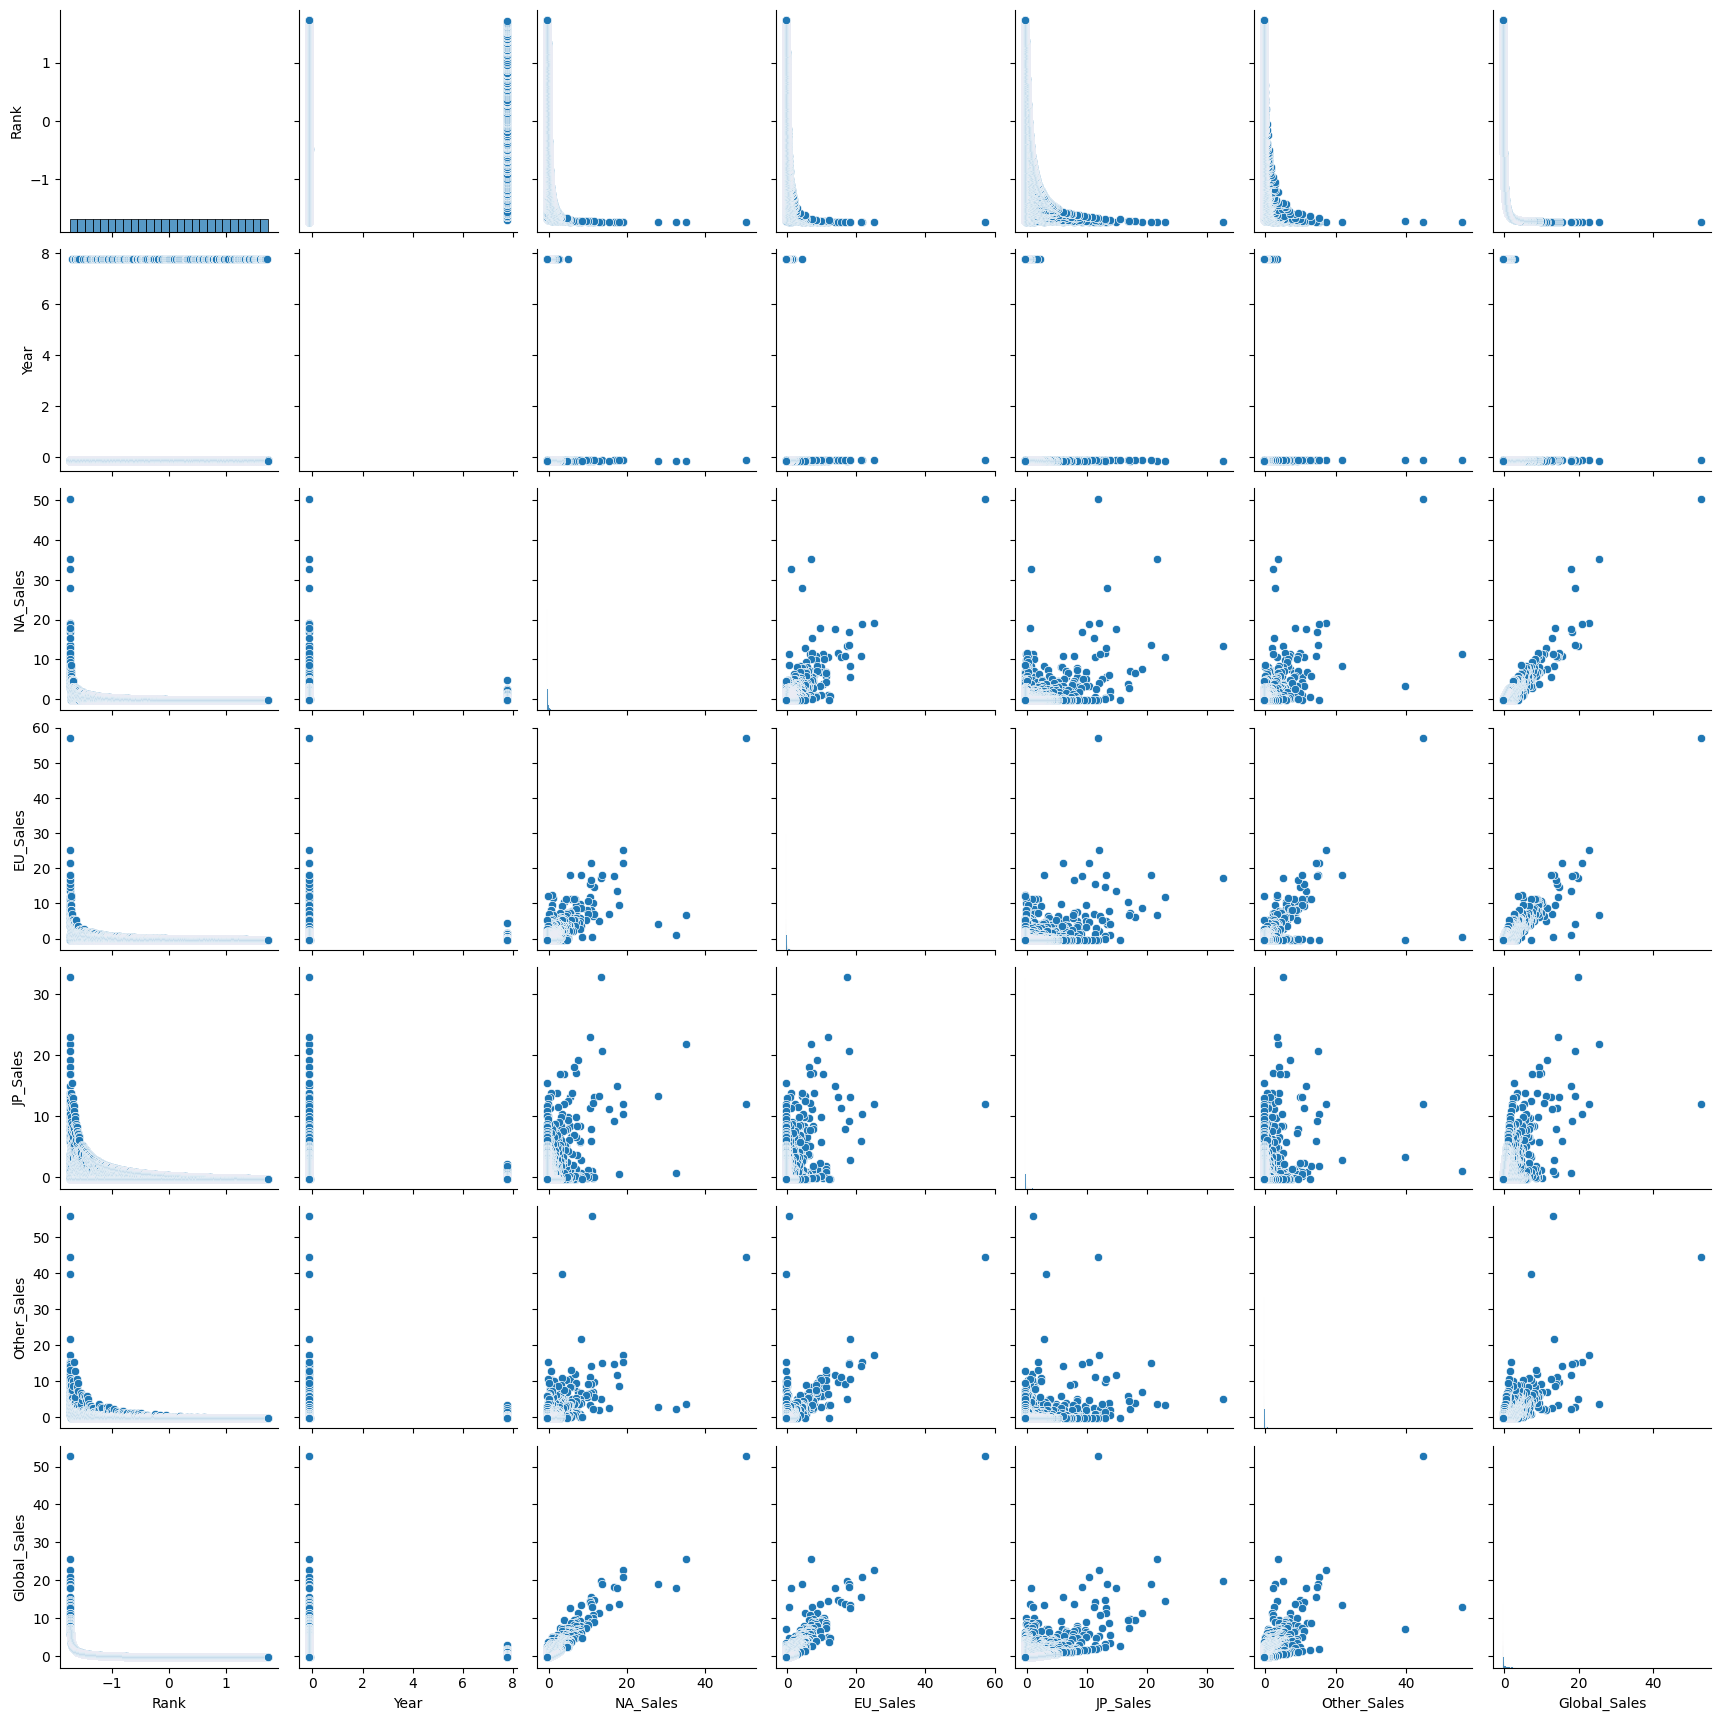

In [53]:
numeric_columns = re_game.select_dtypes(include='number')
scaled_data = re_scaler.fit_transform(numeric_columns)
sns.pairplot(pd.DataFrame(scaled_data, columns=numeric_columns.columns))
plt.show()

### Min-Max Scaling
- 데이터의 최솟값은 0, 최대값은 1로 변환한다.
- feature 범위가 다를 때 주로 사용하며 화귤 분포를 모를 때 유용하다.
- $\frac {X - X_{min}}{X_{max} - X_{min}}$

#### del_game

In [54]:
from sklearn.preprocessing import MinMaxScaler

del_minmax = MinMaxScaler()
del_minmax.fit_transform(del_game.select_dtypes(include='number'))

array([[0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 3.68884540e-01,
        8.00378430e-01, 1.00000000e+00],
       [6.02445930e-05, 7.00891781e-01, 1.23363198e-01, 6.66340509e-01,
        7.28476821e-02, 4.86280672e-01],
       [1.20489186e-04, 3.82019764e-01, 4.43831840e-01, 3.70841487e-01,
        3.13150426e-01, 4.32853862e-01],
       ...,
       [9.99879511e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [9.99939755e-01, 0.00000000e+00, 3.44589938e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.41021933e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]])

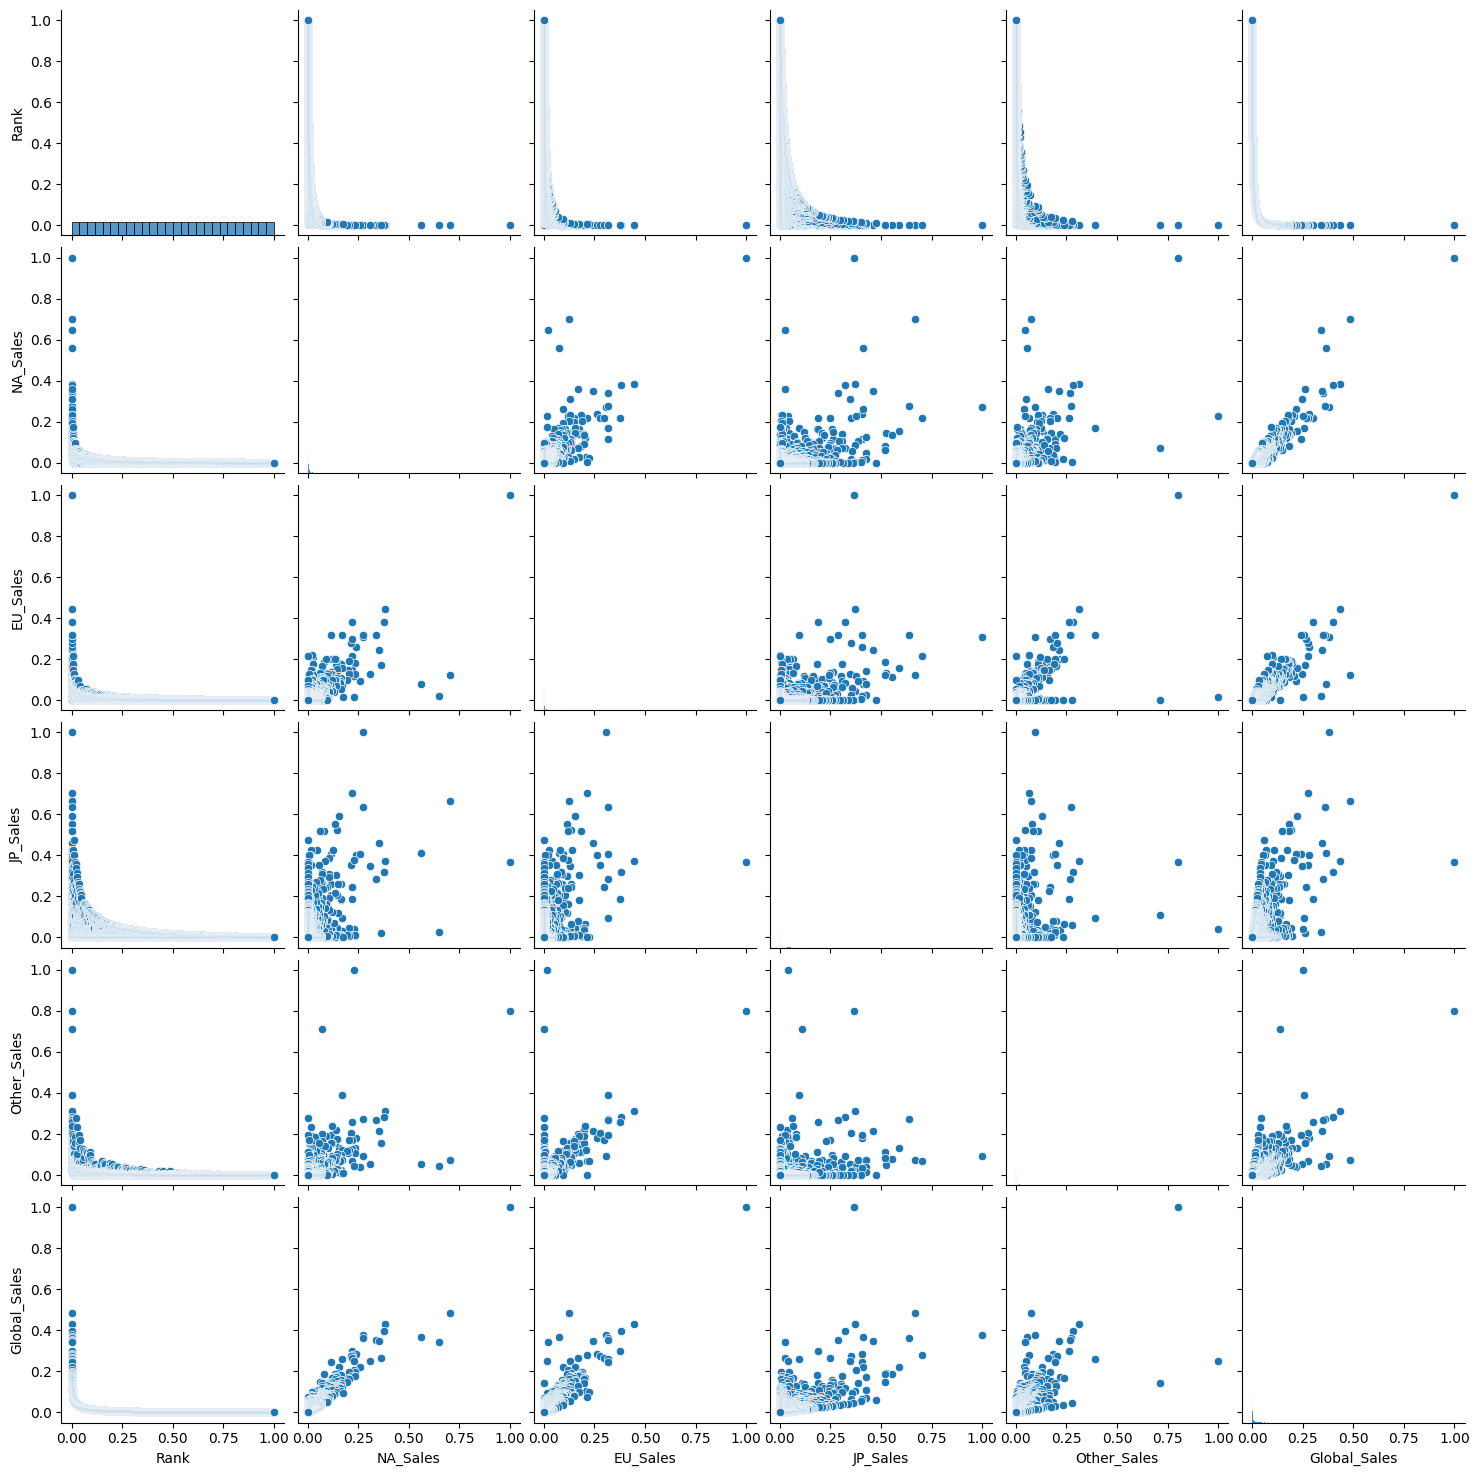

In [55]:
numeric_columns = del_game.select_dtypes(include='number')
scaled_data = del_minmax.fit_transform(numeric_columns)
sns.pairplot(pd.DataFrame(scaled_data, columns=numeric_columns.columns))
plt.show()

#### re_game

In [56]:
from sklearn.preprocessing import MinMaxScaler

re_minmax = MinMaxScaler()
re_minmax.fit_transform(re_game.select_dtypes(include='number'))

array([[0.00000000e+00, 3.24229954e-03, 1.00000000e+00, ...,
        3.68884540e-01, 8.00378430e-01, 1.00000000e+00],
       [6.02445930e-05, 6.23519142e-04, 7.00891781e-01, ...,
        6.66340509e-01, 7.28476821e-02, 4.86280672e-01],
       [1.20489186e-04, 3.49170720e-03, 3.82019764e-01, ...,
        3.70841487e-01, 3.13150426e-01, 4.32853862e-01],
       ...,
       [9.99879511e-01, 3.49170720e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99939755e-01, 3.74111485e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.86818805e-03, 2.41021933e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

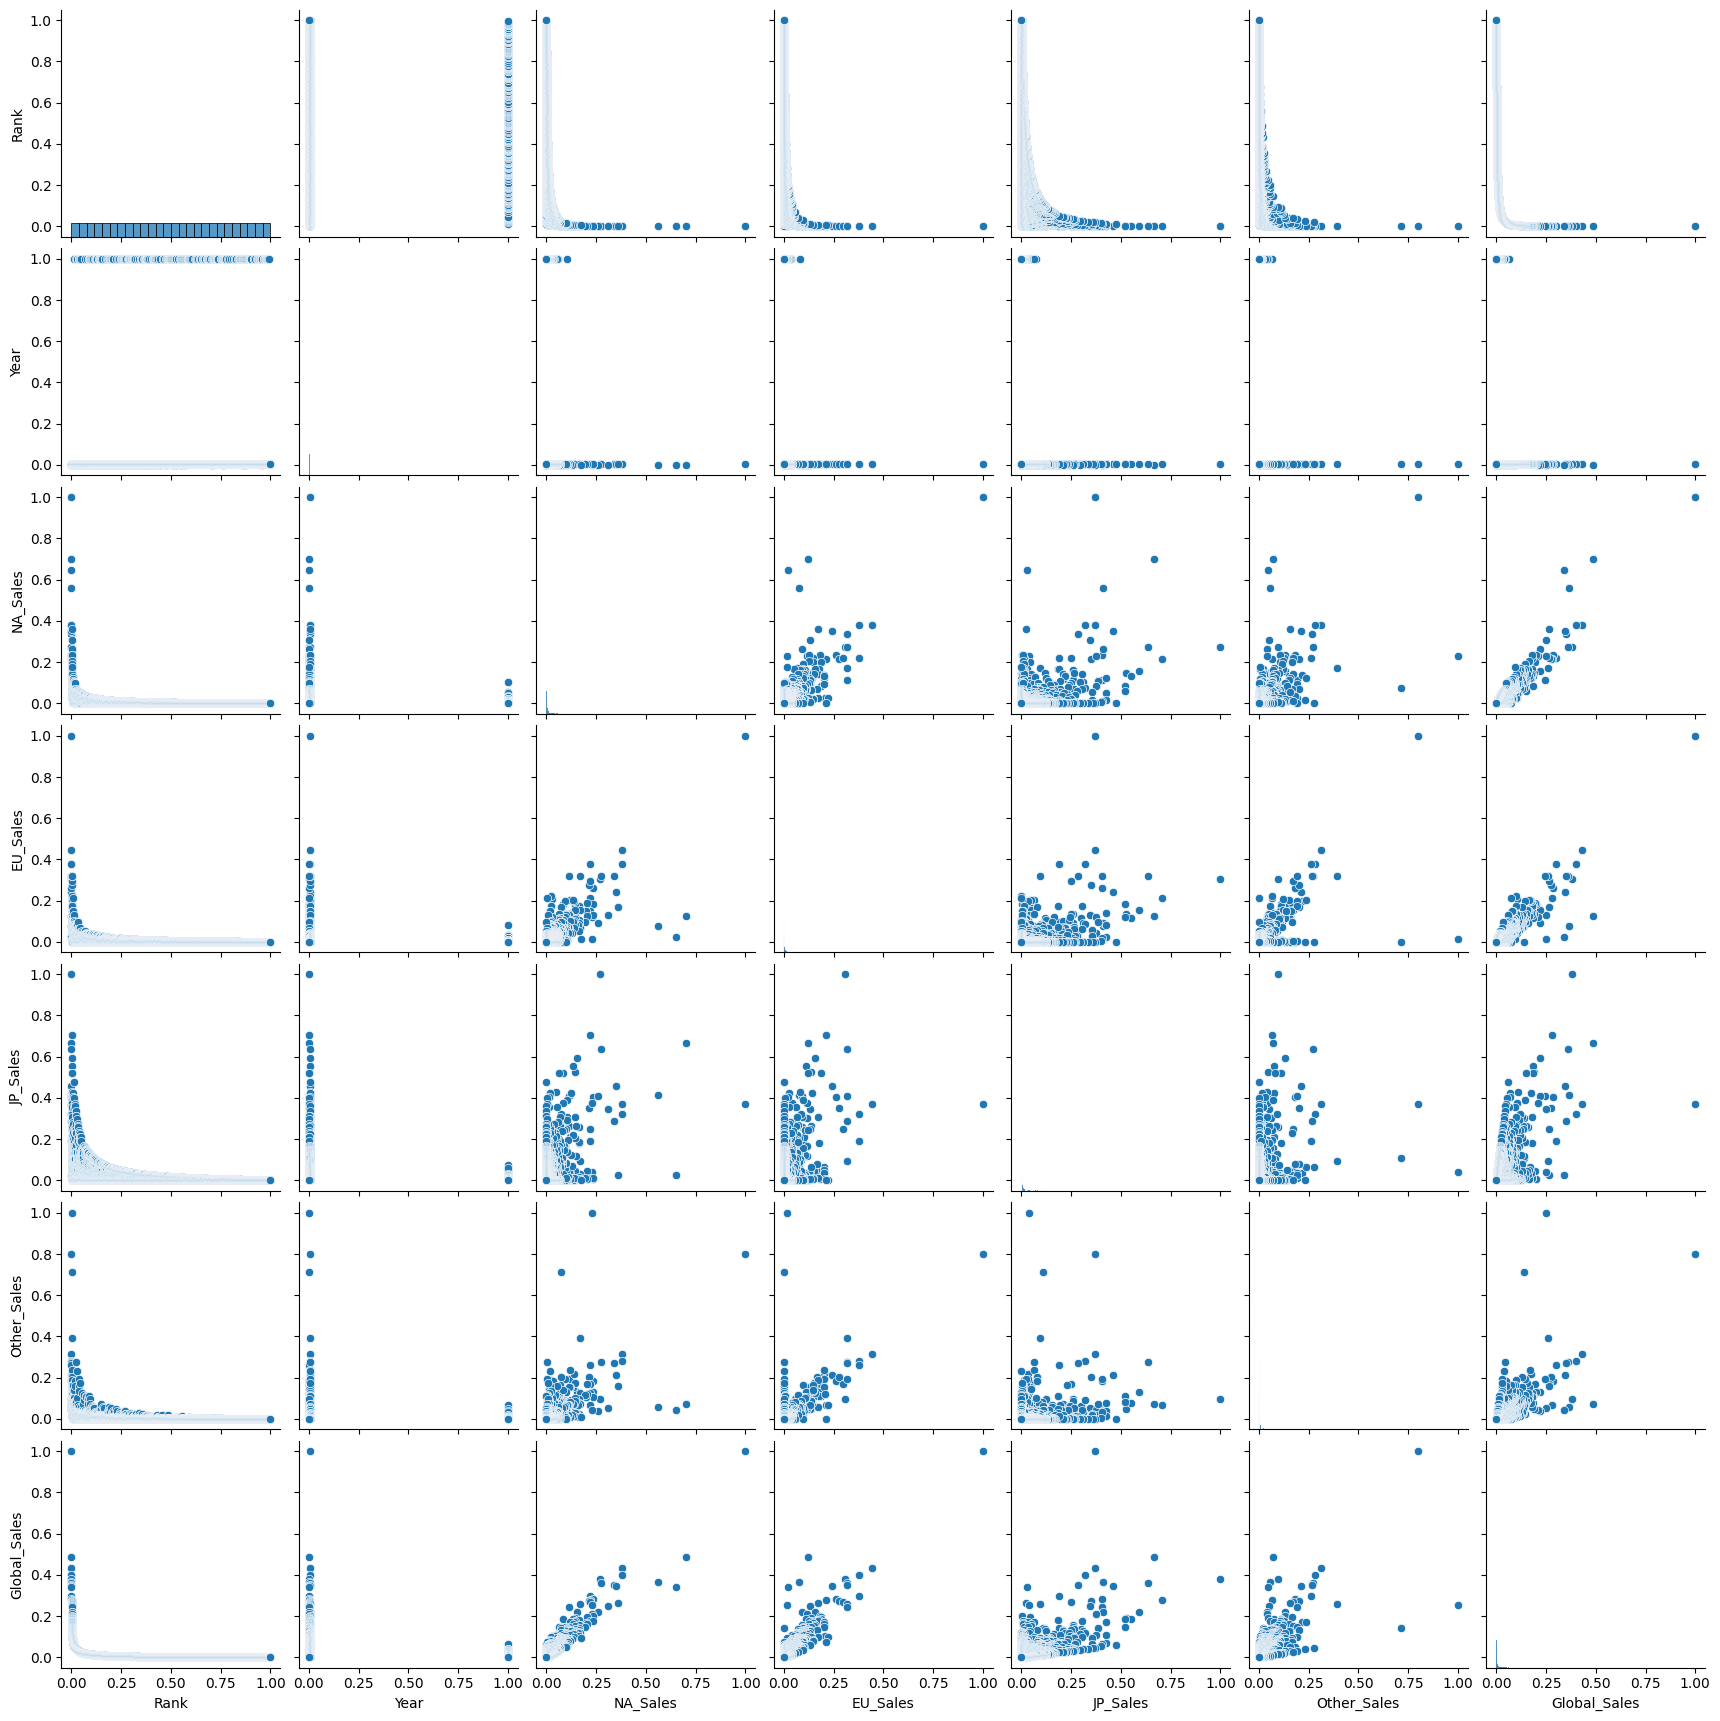

In [57]:
numeric_columns = re_game.select_dtypes(include='number')
scaled_data = re_minmax.fit_transform(numeric_columns)
sns.pairplot(pd.DataFrame(scaled_data, columns=numeric_columns.columns))
plt.show()

## 인코딩(Encoding)

원-핫 인코딩(one-hot encoding)
- 카테고리별 이진 특성을 만들어 해당 특성만 1, 나머지는 0으로 만드는 방법

### del_game

In [58]:
del_game.select_dtypes(include='object')

,Name,Platform,Genre
0,Wii Sports,Wii,Sports
1,Super Mario Bros.,NES,Platform
2,Mario Kart Wii,Wii,Racing
3,Wii Sports Resort,Wii,Sports
4,Pokemon Red/Pokemon Blue,GB,Role-Playing
...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,Platform
16594,Men in Black II: Alien Escape,GC,Shooter
16595,SCORE International Baja 1000: The Official Game,PS2,Racing
16596,Know How 2,DS,Puzzle


1. Name

In [59]:
del_game['Name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Plushees', 'Woody Woodpecker in Crazy Castle 5', 'Know How 2'],
      dtype=object)

In [60]:
del_game['Name'].nunique()

11493

2. Platform

In [61]:
del_game['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [62]:
del_game['Platform'].nunique()

31

3. Genre

In [63]:
del_game['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [64]:
del_game['Genre'].nunique()

12

### re_game

del_game 에 없는 Publisher 만 뽑으면 된다.

In [65]:
re_game.select_dtypes(include='object')

,Name,Platform,Genre,Publisher
0,Wii Sports,Wii,Sports,Nintendo
1,Super Mario Bros.,NES,Platform,Nintendo
2,Mario Kart Wii,Wii,Racing,Nintendo
3,Wii Sports Resort,Wii,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo
...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,Platform,Kemco
16594,Men in Black II: Alien Escape,GC,Shooter,Infogrames
16595,SCORE International Baja 1000: The Official Game,PS2,Racing,Activision
16596,Know How 2,DS,Puzzle,7G//AMES


Publisher

In [66]:
re_game['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Unknown', 'Majesco Entertainment', 'Codemasters', 'Red Orb',
       'Level 5', 'Arena Entertainment', 'Midway Games', 'JVC',
       'Deep Silver', '989 Studios', 'NCSoft', 'UEP Systems',
       'Parker Bros.', 'Maxis', 'Imagic', 'Tecmo Koei', 'Valve Software',
       'ASCII Ent

In [67]:
re_game['Publisher'].nunique()

578

### 원-핫 인코딩

나머지는 너무 많은 수의 카테고리가 있기 때문에 비교적 적은 Genre에 대해 원-핫 인코딩을 할 것이다.

In [68]:
encoding = del_game.copy()
encoding.head()

,Rank,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,Sports,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,Racing,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,Sports,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37


In [69]:
one_hot = pd.get_dummies(encoding['Genre'], dtype=int) 
one_hot.head()

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,0
